# Financial Planning with APIs and Simulations

In [220]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
from MCForecastTools import MCSimulation
load_dotenv()
%matplotlib inline

# Identify most recent completed weekday from a given date.
def date_to_weekday(year, month, day):
      start_date = datetime.datetime(year, month, day)
      offset = max(1, (start_date.weekday() + 6) % 7 - 3)
      timedelta = datetime.timedelta(offset)
      most_recent = start_date - timedelta
      return most_recent

#todays date:
today_date = str(datetime.datetime.now()).split()[0]
#one year ago from given "todays" date:
def one_year_ago(end_date):
      answer = str(end_date - datetime.timedelta(days=1*365)).split()[0]
      return answer


#alpaca rest object
alpaca_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret = os.getenv('APCA_API_SECRET_KEY')
alpaca_url = os.getenv('APCA_API_BASE_URL')
alpaca_version = 'v2'

alpaca = tradeapi.REST(
    alpaca_key,
    alpaca_secret,
      alpaca_url,
  alpaca_version
)

## Part 1: Create a Financial Planner

In [208]:
#Add coins to portfolio:
btc_coins = 1.2
eth_coins = 5.3

In [201]:
#Crypto URL's
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [202]:
#crypto api calls
btc_response = requests.get(btc_url).json()
eth_response =  requests.get(eth_url).json()
btc_dump = json.dumps(btc_response, indent=4, sort_keys=True)
eth_dump = json.dumps(eth_response, indent=4, sort_keys=True)

#bitcoin data
btc_current_price = btc_response['data']['1']['quotes']['USD']['price']
btc_market_cap = btc_response['data']['1']['quotes']['USD']['market_cap']
btc_total_supply = btc_response['data']['1']['total_supply']

#etherium data
eth_current_price = eth_response['data']['1027']['quotes']['USD']['price']
eth_market_cap = eth_response['data']['1027']['quotes']['USD']['market_cap']
eth_total_supply = eth_response['data']['1027']['total_supply']

print(f"The current price for Bit Coin is ${btc_current_price}\n"
      f"The current Market-Cap for Bit Coin is ${btc_market_cap}\n"
      f"The current total supply for Bit Coin is ${btc_total_supply}\n"
      f"The current price for Ether Coin is ${eth_current_price}\n"
      f"The current Market Cap for Ether is ${eth_market_cap}\n"
      f"The current total supply for Ether is ${eth_total_supply}\n")

#pull values
btc_value = btc_total_supply * btc_current_price
eth_value = eth_total_supply * eth_current_price
print(f"The current market value of Bit Coin is ${btc_value}\n"
      f"The current market value of Eth is is ${eth_value}\n")

total_crypto_wallet = (btc_coins*btc_current_price) + (eth_coins*eth_current_price)

print(f"Your crypto wallet balance is: ${total_crypto_wallet}")


The current price for Bit Coin is $37245.0
The current Market-Cap for Bit Coin is $693270769027
The current total supply for Bit Coin is $18733925
The current price for Ether Coin is $2408.23
The current Market Cap for Ether is $279082710722
The current total supply for Ether is $116276105

The current market value of Bit Coin is $697745036625.0
The current market value of Eth is is $280019604344.15

Your crypto wallet balance is: $57457.619


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK


In [233]:
# Current portfolio
monthly_income = 12000
spy_shares = 110
agg_shares = 200

tickers = ['SPY','AGG']
timeframe = '1D'
end_date = date_to_weekday(2021,6,12)
start_date = one_year_ago(end_date)


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [234]:
portfolio_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
portfolio_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-01-20 00:00:00-05:00  117.35  117.4300  117.3100  117.40  3877734   
2021-01-21 00:00:00-05:00  117.22  117.2985  117.1400  117.26  5801029   
2021-01-22 00:00:00-05:00  117.29  117.3200  117.1900  117.26  3469745   
2021-01-25 00:00:00-05:00  117.39  117.5600  117.3600  117.54  3977366   
2021-01-26 00:00:00-05:00  117.46  117.5850  117.4255  117.51  3451493   

                              SPY                                       
                             open      high      low   close    volume  
time                                                                    
2021-01-20 00:00:00-05:00  381.11  384.7900  380.690  383.86  53064901  
2021-01-21 00:00:00-05:00  384.49  384.9500  383.250  384.20  41800991  
2021-01-22 00:00:00-05:00  382.25  384.1256  381.835  382.86  39108239  
2021-01-25 00:00:00-05:00  383.67  384.7700  378.460  384.40  61090775  
2021-01-26 00:00:00-05:00  385.41  385.8500  383.540  383.83  36871235

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [241]:
agg_close_price = (portfolio_prices_df["AGG"]["close"])
agg_close_price = float(agg_close_price['2021-06-11'])

#spy close
spy_close_price = (portfolio_prices_df["SPY"]["close"])
spy_close_price = float(spy_close_price['2021-06-11'])

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [244]:
#agg value
agg_value = agg_shares * agg_close_price

#spy value
spy_value = spy_shares * spy_close_price

#total value
bond_value = agg_value + spy_value
portfolio_value = total_crypto_wallet + bond_value

print(f"Your portfolio is currently valued at: ${portfolio_value:.2f}")

Your portfolio is currently valued at: $127179.72


## Evaluate the Emergency Fund

#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

<AxesSubplot:title={'center':'Total value for (crypto and stock/bond)'}, ylabel='amount'>

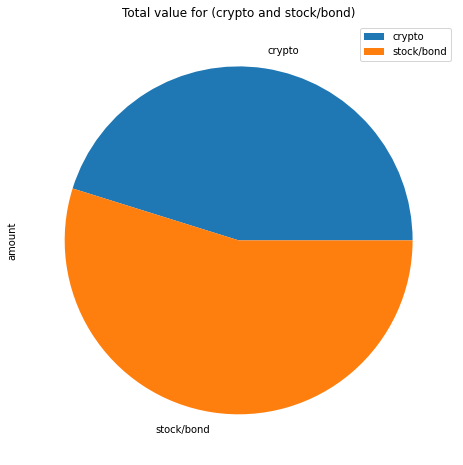

In [245]:
#all assets
savings_data = [total_crypto_wallet, bond_value]
#create dataframe
savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto','stock/bond'])
#visualize savings
savings_df.plot.pie(y ='amount', figsize=(16,8), title=('Total value for (crypto and stock/bond)'))

#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

In [248]:
emergency_fund_value = monthly_income * 3
distance_to_goal = emergency_fund_value - portfolio_value

#check on status of saving:
if portfolio_value > emergency_fund_value:

    print(" You surpassd your goal! ")

elif portfolio_value == emergency_fund_value:

    print(" You hit your goal! ")

elif portfolio_value < emergency_fund_value:

        print(f" We are ${distance_to_goal:.2f} away from reaching your set goal for an Emergency Fund.")

 You surpassd your goal! 


## Part 2: Create a Financial Planner for Retirement


#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [258]:
#create 10 year histo for past 10 years
ten_year_hist = str(datetime.datetime.now() - datetime.timedelta(days=10*365)).split()[0]
ten_year_hist_time = pd.Timestamp(ten_year_hist , tz="America/New_York").isoformat()
end_date_ten_year = pd.Timestamp(today_date, tz="America/New_York").isoformat()

#create dataframe for prices:
tenyear_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = ten_year_hist_time,
    end = end_date_ten_year
).df

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [259]:
#create MC for forcsting 30 year cumulative returns w/ 500 samples
thirty_year_simulation = MCSimulation(
    portfolio_data=tenyear_prices_df,
    weights=[0.40, 0.60],
    num_simulation=500,
    num_trading_days=252 * 30
)


In [261]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994934,1.002577,0.999734,1.007338,1.013680,0.993820,1.005019,0.993181,0.987864,1.001154,...,0.991242,0.995806,0.994327,1.004741,0.994568,0.998342,1.003689,0.998902,0.996923,1.001136
2,0.990816,1.006376,0.999944,1.014277,1.010364,1.000952,1.004256,1.002737,0.988436,1.003829,...,0.993274,1.000364,0.988302,1.005281,0.995492,0.999675,0.999889,1.004658,0.994083,1.004679
3,0.991176,1.004083,0.997135,1.012564,1.016753,1.005659,1.004236,1.003327,0.984680,1.005618,...,0.996586,1.001648,0.977564,1.010782,0.994641,0.991102,1.002415,1.004938,0.994084,1.012244
4,0.995046,1.008308,0.987531,1.008955,1.016448,1.005755,1.003716,0.999489,0.992539,1.006618,...,0.994662,0.999366,0.981074,1.009258,1.002616,0.993696,0.997241,1.001020,1.005688,1.008368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,62.609085,68.552624,26.767891,73.395738,42.560756,68.907238,99.158359,28.479783,44.395474,75.284703,...,18.863529,31.074642,118.284317,76.242143,87.158307,36.337299,100.441478,27.421631,30.950986,87.207881
7557,63.101239,68.043924,26.629834,73.422319,42.628923,68.903609,99.176235,28.533154,44.326366,75.540312,...,18.913744,31.003970,117.941861,75.806498,87.531765,36.221579,100.501509,27.198607,30.876119,87.774377
7558,63.328256,67.861120,26.668262,73.792210,42.512062,68.899831,99.723577,28.303641,44.286730,75.439592,...,19.102761,30.923920,117.817262,75.033237,87.780140,36.124185,100.811958,27.284447,30.878262,87.550606
7559,63.250664,67.938953,26.886999,73.940416,42.517796,68.937689,99.258087,28.049077,44.093068,75.227727,...,19.065821,31.230116,116.766734,75.472093,88.008582,36.221912,100.141766,27.181444,30.649466,87.386553


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

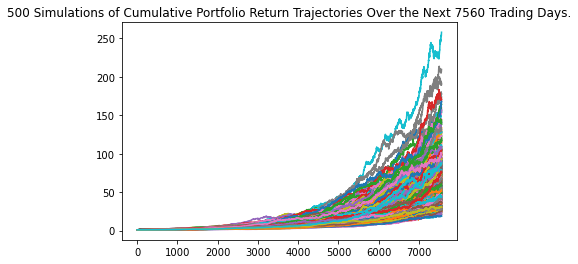

In [262]:
#plot simulation
thirty_year_simulation.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

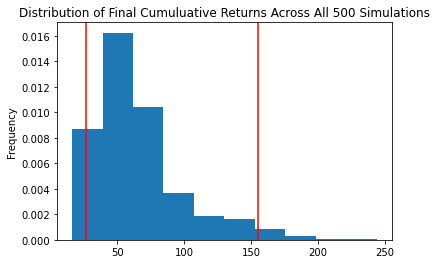

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

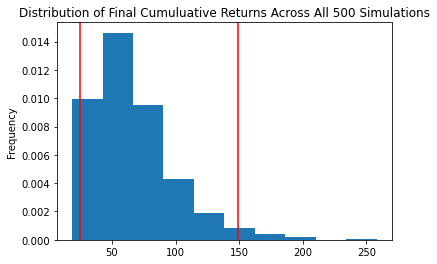

In [264]:
#plot distribution
thirty_year_simulation.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [271]:
#summary statistics:
summary_stats = thirty_year_simulation.summarize_cumulative_return()
print(summary_stats)

count           500.000000
mean             66.057833
std              32.415433
min              18.693615
25%              43.429446
50%              58.951547
75%              81.132393
max             257.897412
95% CI Lower     24.954317
95% CI Upper    149.253201
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts


In [268]:
#current stock ownership value
print(f"The current value of your stock portfolio ${spy_value:.2f}")
#current bond ownership value
print(f"The current value of your bond portfolio ${agg_value:.2f}")

The current value of your stock portfolio $46674.10
The current value of your bond portfolio $23048.00


In [274]:
#lower cum. return
ci_lower_ten_cumulative_return = summary_stats[8]*portfolio_value
#upper cum. return
ci_upper_ten_cumulative_return = summary_stats[9]*portfolio_value

#deliver findings:
print(f"There is a 95% chance that an initial investment of ${portfolio_value:.2f} in the portfolio\n"
      f" over the next year will end within in the range of"
      f" ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f}.")




There is a 95% chance that an initial investment of $127179.72 in the portfolio
 over the next year will end within in the range of $3,173,683.04 and $18,981,980.16.
